# Jonathan Halverson
# Wednesday, July 19, 2017
# Chapter 3 of Bruce & Bruce

The test statistic is the metric used to the measure the effect of the treatment. The null and alternative hypotheses should account for all possible outcomes. A one-way test counts chance results in only one direction.

If you ask someone to write down the outcome of a series of coin flips they tend to underestimate the number of consectutive heads and tails. For instance, getting 4 or 5 heads in a row in not uncommon in 100 flips.

An exhaustive permutation test is when all possible combinations are considered and the outcome of each is collectively compared to the observed outcome. A bootstrap permutation test involves drawing a bootstrap sample and then doing the test numerically.

Significance testing or hypothesis testing: The p-value is the probability of the observing the given outcome or more extremes outcomes given that the null hypothesis is true. Small values  lead us to side with the alternative hypothesis. The ASA released a statement on p-values. A psychology journal banned the use of p-values because authors were looking for effects without first puttig forth a hypothesis.

Test statistic to t-statistic or t-score to p value.

## Here we consider the birth weight of babies from mothers who smoked and did not

In [103]:
import pandas as pd

In [104]:
df = pd.read_csv('nc.csv', header=0)
df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
fage              829 non-null float64
mage              1000 non-null int64
mature            1000 non-null object
weeks             998 non-null float64
premie            998 non-null object
visits            991 non-null float64
marital           999 non-null object
gained            973 non-null float64
weight            1000 non-null float64
lowbirthweight    1000 non-null object
gender            1000 non-null object
habit             999 non-null object
whitemom          998 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 101.6+ KB


In [106]:
ns = df[df.habit == 'nonsmoker'].weight.mean()
ns

7.144272623138631

In [107]:
sm = df[df.habit == 'smoker'].weight.mean()
sm

6.828730158730158

In [108]:
ns - sm

0.3155424644084732

We see that the mean baby weight of non-smoking mothers is higher than that of smokers. Is this by chance or is there an effect of smoking? There are 1000 total records.

In [109]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('halverson')

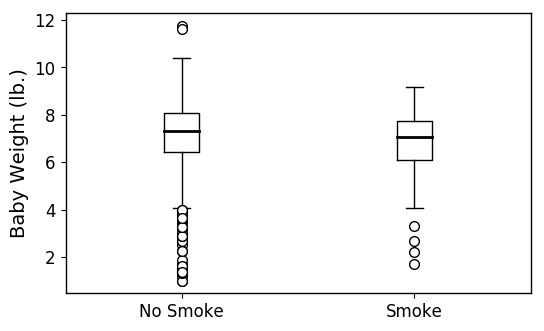

In [110]:
plt.boxplot([df[df.habit == 'nonsmoker'].weight, df[df.habit == 'smoker'].weight], labels=['No Smoke', 'Smoke'])
plt.ylabel('Baby Weight (lb.)')

### Permutation test approach

In [111]:
df[df.habit == 'nonsmoker'].shape

(873, 13)

In [112]:
df[df.habit == 'smoker'].shape

(126, 13)

In [113]:
diffs = []
for _ in range(1000):
     x = np.random.permutation(df.weight)
     diff = x[:873].mean() - x[873:].mean()
     diffs.append(diff)

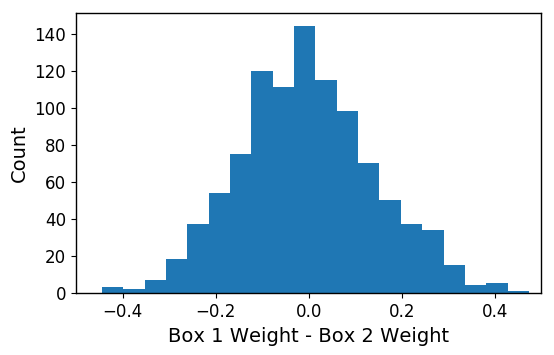

In [114]:
plt.hist(diffs, bins=20)
plt.xlim(-0.5, 0.5)
plt.xlabel('Box 1 Weight - Box 2 Weight')
plt.ylabel('Count')

We see from the histogram above that a difference between the two groups of 0.3 is very unlikely. To be exact:

In [115]:
np.percentile(diffs, q=95)

0.25406553562248047

In [116]:
from scipy.stats import percentileofscore

percentileofscore(diffs, ns - sm)

98.400000000000006

This shows that 98.5 percent of the permutation results were less than the observed difference suggesting that the result is statistically significant (i.e., the difference is weight is not due to chance).

### Equation-based approach

In [117]:
y_smk = df[df.habit == 'smoker'].weight
n_smk = df[df.habit == 'nonsmoker'].weight
SE = (y_smk.var() / y_smk.shape[0] + n_smk.var() / n_smk.shape[0])**0.5
t_score = ((ns - sm) - 0.0) / SE
t_score

2.3590109449337278

In [118]:
from scipy.stats import t
2 * (1.0 - t.cdf(t_score, min(y_smk.shape[0], n_smk.shape[0]) - 1))

0.019873628464891269

### Library approach

In [119]:
from scipy.stats import ttest_ind

In [120]:
t_score, p_value = ttest_ind(df[df.habit == 'smoker'].weight, df[df.habit == 'nonsmoker'].weight, equal_var=False)
t_score, p_value

(-2.3590109449335013, 0.01945055644373227)

## ANOVA with permutation

In [121]:
rf = pd.read_csv('mlbBat10.txt', sep='\t')
rf.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


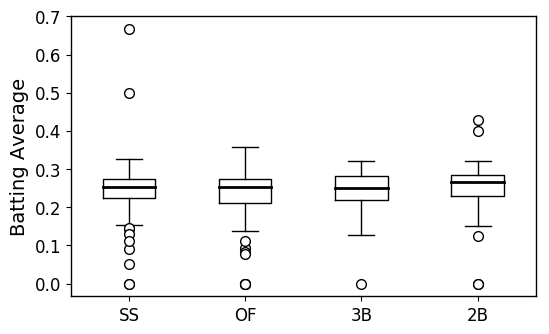

In [133]:
labels_ = ['SS', 'OF', '3B', '2B']
plt.boxplot([rf[rf.position == 'SS'].AVG, rf[rf.position == 'OF'].AVG, rf[rf.position == '3B'].AVG, rf[rf.position == '2B'].AVG], labels=labels_)
plt.ylabel('Batting Average')

In [134]:
rf[rf.position == 'SS'].AVG.mean(), rf[rf.position == 'SS'].AVG.shape[0]

(0.2434788732394367, 71)

In [135]:
rf[rf.position == 'OF'].AVG.mean(), rf[rf.position == 'OF'].AVG.shape[0]

(0.24080530973451345, 226)

In [136]:
rf[rf.position == '3B'].AVG.mean(), rf[rf.position == '3B'].AVG.shape[0]

(0.24209859154929578, 71)

In [137]:
rf[rf.position == '2B'].AVG.mean(), rf[rf.position == '2B'].AVG.shape[0]

(0.2516388888888889, 72)

In [140]:
rf.position.value_counts()

P     544
OF    226
C     113
2B     72
SS     71
3B     71
1B     69
DH     25
-       8
Name: position, dtype: int64

In [163]:
select = rf[rf.position.isin(labels_)]

In [159]:
ss = rf[rf.position == 'SS'].shape[0]
of = rf[rf.position == 'OF'].shape[0]
b3 = rf[rf.position == '3B'].shape[0]
b2 = rf[rf.position == '2B'].shape[0]

vars_ = []
grand_avg = select.AVG.mean()
for _ in range(1000):
     x = np.random.permutation(select.AVG)
     m1 = x[:ss].mean()
     m2 = x[ss:ss+of].mean()
     m3 = x[ss+of:ss+of+b3].mean()
     m4 = x[ss+of+b3:].mean()
     vars_.append((m1 - grand_avg)**2 + (m2 - grand_avg)**2 +(m3 - grand_avg)**2 +(m4 - grand_avg)**2)

(array([ 207.,  223.,  166.,  133.,  107.,   56.,   35.,   29.,   15.,
          15.,    5.,    4.,    2.,    0.,    1.,    1.,    0.,    0.,
           0.,    1.]),
 array([  9.53123305e-07,   5.00081572e-05,   9.90631911e-05,
          1.48118225e-04,   1.97173259e-04,   2.46228293e-04,
          2.95283327e-04,   3.44338361e-04,   3.93393395e-04,
          4.42448428e-04,   4.91503462e-04,   5.40558496e-04,
          5.89613530e-04,   6.38668564e-04,   6.87723598e-04,
          7.36778632e-04,   7.85833666e-04,   8.34888700e-04,
          8.83943734e-04,   9.32998768e-04,   9.82053801e-04]),
 <a list of 20 Patch objects>)

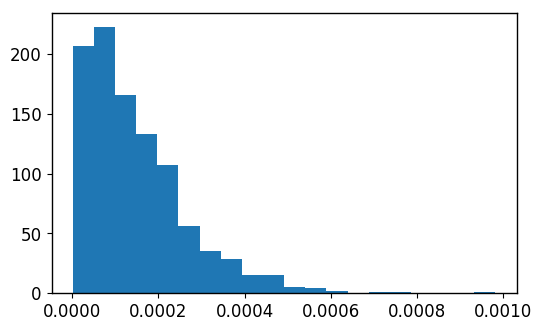

In [162]:
plt.hist(vars_, bins=20)

In [166]:
obs = (rf[rf.position == 'SS'].AVG.mean() - grand_avg)**2 + (rf[rf.position == 'OF'].AVG.mean() - grand_avg)**2
(rf[rf.position == '3B'].AVG.mean() - grand_avg)**2 + (rf[rf.position == '2B'].AVG.mean() - grand_avg)**2
obs

5.889911709261636e-06

In [167]:
percentileofscore(vars_, obs)

0.70000000000000007

We see the observed result is in the less than 1 percentile.